In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import cos
from math import log
from scipy.interpolate import interp1d

In [2]:
T1=27.4
T2=0.025
omega1=0.67
phi1=1.53

R1=196.9
R2=0.033
omega2=0.65
phi2=1.99

In [3]:
# Funções de temperatura e chuva fora do contexto da função lotkavolterra
def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

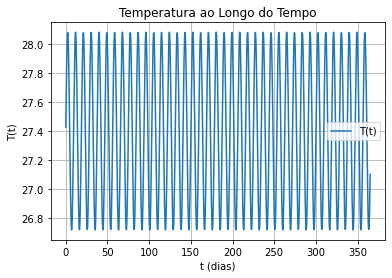

In [4]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
T_values = [T(t) for t in t_values]

# Plotando
plt.plot(t_values, T_values, label='T(t)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('T(t)')
plt.legend()
plt.grid(True)
plt.show()

Período da oscilação:


$$T = \dfrac{2\pi}{\omega_1}$$

$$\omega_1 = \dfrac{2\pi}{T}$$

In [5]:
w = n(2*pi/T1)
w

0.229313332378817

In [6]:
T1=27.4
T2=0.025
omega1=0.025
phi1=1.53

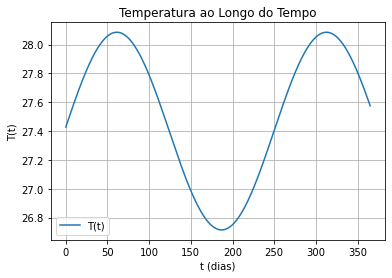

In [7]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
T_values = [T(t) for t in t_values]

# Plotando
plt.plot(t_values, T_values, label='T(t)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('T(t)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
T1=27.4
T2=0.025
omega1=0.125
phi1=0.5

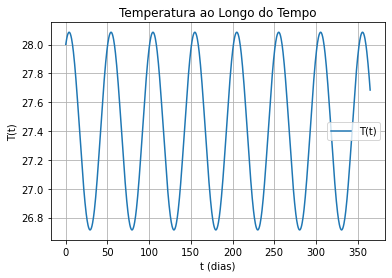

In [9]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
T_values = [T(t) for t in t_values]

# Plotando
plt.plot(t_values, T_values, label='T(t)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('T(t)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
T1=27.4
T2=0.025
omega1=0.02
phi1=1.53

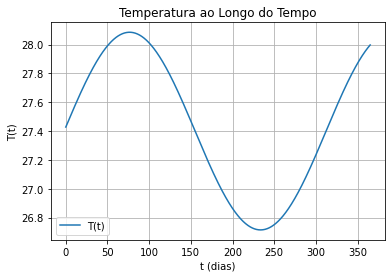

In [11]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
T_values = [T(t) for t in t_values]

# Plotando
plt.plot(t_values, T_values, label='T(t)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('T(t)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
R1=196.9
R2=0.033
omega2=0.025
phi2=1.99

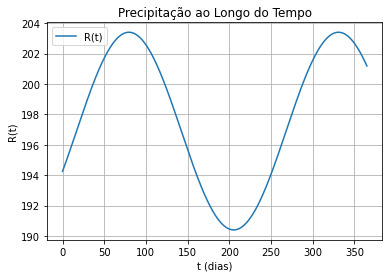

In [13]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
R_values = [R(t) for t in t_values]

# Plotando
plt.plot(t_values, R_values, label='R(t)')
plt.title('Precipitação ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('R(t)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.1
A=-0.03
B=1.31
C=-4.4
b2=0.3
tau_H=10
DD=105
Tmin=14.5
gamma= 1/1095 #1/365
R_L = 50
N=8558
M= 300000 #100000
I_M0=50000 # None
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

In [15]:
def lotkavolterra(t, z, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0):
    S, I, R = z
    
    # Funções de temperatura e chuva
    def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

    def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

    # Duração da fase de desenvolvimento das larvas
    def tau_L(T):
        return 1 / (c1 * T + c2)
    
    # Taxa diária de sobrevivência dos mosquitos
    def p(T):
        return np.exp(-1 / (A*T**2 + B*T + C))
    
    # Probabilidade de sobrevivência das larvas dependente de temperatura e chuva
    def p_LT(T):
        return np.exp(-(c1 * T + c2))
    
    def p_LR(R):
        return (4*p_ML/R_L**2) * R * (R_L - R)
    
    def p_LRT(R,T):
        return p_LR(R)*p_LT(T)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_ER(R):
        return (4*p_ME/R_L**2) * R * (R_L - R)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_PR(R):
        return (4*p_MP/R_L**2) * R * (R_L - R)

    # Duração do ciclo esporogônico
    def tau_M(T):
        return DD / (T - Tmin)

    # Definindo a função de sobrevivência do mosquito
    def l(tau_M, T):  
        p_T = p(T)
        return p_T**tau_M

    # Definindo a taxa de mortalidade do mosquito
    def mu(T):
        return -log(p(T))

    R_curr = R(t)
    T_curr = T(t)
    
    # Calcula a taxa de mordida e probabilidade de transmissão
    def a(T):
        return (T_curr - T1) / D1
    
    a_curr = a(T_curr)
    
    def b(R,T):
        return B_E * p_ME * p_LRT(R_curr,T_curr) * p_MP / (tau_E + tau_L(T_curr) + tau_P)
    
    dSdt = -a_curr * b2 * (I_M0 / N) * S
    dIdt = a_curr * b2 * (I_M0 / N) * S - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dIdt, dRdt] 

In [16]:
args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

t_eval = np.linspace(0, 365, 1000)  # Avalia a solução em 1000 pontos entre 0 e 365
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 191
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff085f8590>
   status: 0
  success: True
        t: array([  0.        ,   0.36536537,   0.73073073,   1.0960961 ,
         1.46146146,   1.82682683,   2.19219219,   2.55755756,
         2.92292292,   3.28828829,   3.65365365,   4.01901902,
         4.38438438,   4.74974975,   5.11511512,   5.48048048,
         5.84584585,   6.21121121,   6.57657658,   6.94194194,
         7.30730731,   7.67267267,   8.03803804,   8.4034034 ,
         8.76876877,   9.13413413,   9.4994995 ,   9.86486486,
        10.23023023,  10.5955956 ,  10.96096096,  11.32632633,
        11.69169169,  12.05705706,  12.42242242,  12.78778779,
        13.15315315,  13.51851852,  13.88388388,  14.24924925,
        14.61461461,  14.97997998,  15.34534535,  15.71071071,
        16.07607608,  16.44144144,  16.80680681,  17.17217217,
   

In [17]:
times = sol.t
S, I, R = sol.y

In [18]:
times

array([  0.        ,   0.36536537,   0.73073073,   1.0960961 ,
         1.46146146,   1.82682683,   2.19219219,   2.55755756,
         2.92292292,   3.28828829,   3.65365365,   4.01901902,
         4.38438438,   4.74974975,   5.11511512,   5.48048048,
         5.84584585,   6.21121121,   6.57657658,   6.94194194,
         7.30730731,   7.67267267,   8.03803804,   8.4034034 ,
         8.76876877,   9.13413413,   9.4994995 ,   9.86486486,
        10.23023023,  10.5955956 ,  10.96096096,  11.32632633,
        11.69169169,  12.05705706,  12.42242242,  12.78778779,
        13.15315315,  13.51851852,  13.88388388,  14.24924925,
        14.61461461,  14.97997998,  15.34534535,  15.71071071,
        16.07607608,  16.44144144,  16.80680681,  17.17217217,
        17.53753754,  17.9029029 ,  18.26826827,  18.63363363,
        18.998999  ,  19.36436436,  19.72972973,  20.0950951 ,
        20.46046046,  20.82582583,  21.19119119,  21.55655656,
        21.92192192,  22.28728729,  22.65265265,  23.01

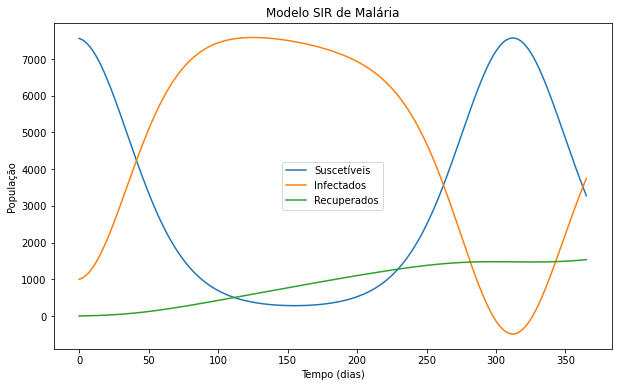

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [20]:
for time, susceptible in zip(times, S):
    if 280 <= time <= 330:
        print(f"Tempo {time:.2f} dias: {susceptible:.2f} suscetíveis")

Tempo 280.24 dias: 5480.57 suscetíveis
Tempo 280.60 dias: 5519.68 suscetíveis
Tempo 280.97 dias: 5558.69 suscetíveis
Tempo 281.33 dias: 5597.56 suscetíveis
Tempo 281.70 dias: 5636.30 suscetíveis
Tempo 282.06 dias: 5674.90 suscetíveis
Tempo 282.43 dias: 5713.35 suscetíveis
Tempo 282.79 dias: 5751.64 suscetíveis
Tempo 283.16 dias: 5789.75 suscetíveis
Tempo 283.52 dias: 5827.70 suscetíveis
Tempo 283.89 dias: 5865.45 suscetíveis
Tempo 284.25 dias: 5903.02 suscetíveis
Tempo 284.62 dias: 5940.38 suscetíveis
Tempo 284.98 dias: 5977.52 suscetíveis
Tempo 285.35 dias: 6014.45 suscetíveis
Tempo 285.72 dias: 6051.15 suscetíveis
Tempo 286.08 dias: 6087.61 suscetíveis
Tempo 286.45 dias: 6123.83 suscetíveis
Tempo 286.81 dias: 6159.78 suscetíveis
Tempo 287.18 dias: 6195.48 suscetíveis
Tempo 287.54 dias: 6230.90 suscetíveis
Tempo 287.91 dias: 6266.04 suscetíveis
Tempo 288.27 dias: 6300.89 suscetíveis
Tempo 288.64 dias: 6335.44 suscetíveis
Tempo 289.00 dias: 6369.68 suscetíveis
Tempo 289.37 dias: 6403.6

In [21]:
for time, infected in zip(times, I):
    if 280 <= time <= 330:
        print(f"Tempo {time:.2f} dias: {infected:.2f} infectados")

Tempo 280.24 dias: 1609.87 infectados
Tempo 280.60 dias: 1570.22 infectados
Tempo 280.97 dias: 1530.71 infectados
Tempo 281.33 dias: 1491.33 infectados
Tempo 281.70 dias: 1452.09 infectados
Tempo 282.06 dias: 1413.02 infectados
Tempo 282.43 dias: 1374.10 infectados
Tempo 282.79 dias: 1335.36 infectados
Tempo 283.16 dias: 1296.80 infectados
Tempo 283.52 dias: 1258.43 infectados
Tempo 283.89 dias: 1220.26 infectados
Tempo 284.25 dias: 1182.30 infectados
Tempo 284.62 dias: 1144.55 infectados
Tempo 284.98 dias: 1107.02 infectados
Tempo 285.35 dias: 1069.73 infectados
Tempo 285.72 dias: 1032.68 infectados
Tempo 286.08 dias: 995.88 infectados
Tempo 286.45 dias: 959.34 infectados
Tempo 286.81 dias: 923.07 infectados
Tempo 287.18 dias: 887.07 infectados
Tempo 287.54 dias: 851.36 infectados
Tempo 287.91 dias: 815.94 infectados
Tempo 288.27 dias: 780.82 infectados
Tempo 288.64 dias: 746.01 infectados
Tempo 289.00 dias: 711.53 infectados
Tempo 289.37 dias: 677.37 infectados
Tempo 289.73 dias: 643

In [22]:
for time, recovered in zip(times, R):
    if 280 <= time <= 330:
        print(f"Tempo {time:.2f} dias: {recovered:.2f} recuperados")

Tempo 280.24 dias: 1467.56 recuperados
Tempo 280.60 dias: 1468.09 recuperados
Tempo 280.97 dias: 1468.61 recuperados
Tempo 281.33 dias: 1469.11 recuperados
Tempo 281.70 dias: 1469.61 recuperados
Tempo 282.06 dias: 1470.08 recuperados
Tempo 282.43 dias: 1470.55 recuperados
Tempo 282.79 dias: 1471.00 recuperados
Tempo 283.16 dias: 1471.44 recuperados
Tempo 283.52 dias: 1471.87 recuperados
Tempo 283.89 dias: 1472.28 recuperados
Tempo 284.25 dias: 1472.69 recuperados
Tempo 284.62 dias: 1473.07 recuperados
Tempo 284.98 dias: 1473.45 recuperados
Tempo 285.35 dias: 1473.82 recuperados
Tempo 285.72 dias: 1474.17 recuperados
Tempo 286.08 dias: 1474.51 recuperados
Tempo 286.45 dias: 1474.83 recuperados
Tempo 286.81 dias: 1475.15 recuperados
Tempo 287.18 dias: 1475.45 recuperados
Tempo 287.54 dias: 1475.74 recuperados
Tempo 287.91 dias: 1476.02 recuperados
Tempo 288.27 dias: 1476.29 recuperados
Tempo 288.64 dias: 1476.55 recuperados
Tempo 289.00 dias: 1476.79 recuperados
Tempo 289.37 dias: 1477.0

In [23]:
anos = [1970, 1980, 1996, 2000, 2007, 2010] 
pop = [311622, 633383, 1154330, 1405835, 1646602, 1802014] 

In [24]:
interpolate_2004 = 2004
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada como".format(interpolate_2004),
      (y_interp(interpolate_2004)).round())

print("A população rural no ano {} foi estimada como".format(interpolate_2004),
      ((y_interp(interpolate_2004))*(0.005)).round())

A população no ano 2004 foi estimada como 1543416.0
A população rural no ano 2004 foi estimada como 7717.0


In [25]:
interpolate_2005 = 2005
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada como".format(interpolate_2005),
      (y_interp(interpolate_2005)).round())

print("A população rural no ano {} foi estimada como".format(interpolate_2005),
      ((y_interp(interpolate_2005))*(0.005)).round())

A população no ano 2005 foi estimada como 1577811.0
A população rural no ano 2005 foi estimada como 7889.0


In [26]:
interpolate_2006 = 2006
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada como".format(interpolate_2006),
      (y_interp(interpolate_2006)).round())

print("A população rural no ano {} foi estimada como".format(interpolate_2006),
      ((y_interp(interpolate_2006))*(0.005)).round())

A população no ano 2006 foi estimada como 1612207.0
A população rural no ano 2006 foi estimada como 8061.0


In [27]:
interpolate_2007 = 2007
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada como".format(interpolate_2007),
      (y_interp(interpolate_2007)).round())

print("A população rural no ano {} foi estimada como".format(interpolate_2007),
      ((y_interp(interpolate_2007))*(0.005)).round())

A população no ano 2007 foi estimada como 1646602.0
A população rural no ano 2007 foi estimada como 8233.0


In [28]:
interpolate_2008 = 2008
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada como".format(interpolate_2008),
      (y_interp(interpolate_2008)).round())

print("A população rural no ano {} foi estimada como".format(interpolate_2008),
      ((y_interp(interpolate_2008))*(0.005)).round())

A população no ano 2008 foi estimada como 1698406.0
A população rural no ano 2008 foi estimada como 8492.0


#################################################################

In [29]:
def interpolation(d, x):
    output = d[0][1] + (x - d[0][0]) * ((d[1][1] - d[0][1])/(d[1][0] - d[0][0]))
    return output
  

data_0_7=[[2000, 1405835],[2007, 1646602]]   # [[ano x, pop x],[ano y, pop y]]
data_0_10=[[2000, 1405835],[2010, 1802014]]  
data_7_10=[[2007, 1646602],[2010, 1802014]]     
    
ano_2004 = 2004
  
print("A população no ano {} foi estimada (2000-2007) como".format(ano_2004),
             interpolation(data_0_7, ano_2004).round())
print(' ')
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2004),
             interpolation(data_0_10, ano_2004).round())

A população no ano 2004 foi estimada (2000-2007) como 1543416
 
A população no ano 2004 foi estimada (2000-2010) como 1564307


In [30]:
ano_2005 = 2005
  
print("A população no ano {} foi estimada (2000-2007) como".format(ano_2005),
             interpolation(data_0_7, ano_2005).round())
print(' ')
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2005),
             interpolation(data_0_10, ano_2005).round())

A população no ano 2005 foi estimada (2000-2007) como 1577811
 
A população no ano 2005 foi estimada (2000-2010) como 1603925


In [31]:
ano_2006 = 2006
  
print("A população no ano {} foi estimada (2000-2007) como".format(ano_2006),
             interpolation(data_0_7, ano_2006).round())
print(' ')
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2006),
             interpolation(data_0_10, ano_2006).round())

A população no ano 2006 foi estimada (2000-2007) como 1612207
 
A população no ano 2006 foi estimada (2000-2010) como 1643542


In [32]:
ano_2007 = 2007
  
print("A população no ano {} foi estimada (2000-2007) como".format(ano_2007),
             interpolation(data_0_7, ano_2007).round())
print(' ')
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2007),
             interpolation(data_0_10, ano_2007).round())

A população no ano 2007 foi estimada (2000-2007) como 1646602
 
A população no ano 2007 foi estimada (2000-2010) como 1683160


In [33]:
ano_2008 = 2008
  
print("A população no ano {} foi estimada (2000-2007) como".format(ano_2008),
             interpolation(data_0_7, ano_2008).round())
print(' ')
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2008),
             interpolation(data_0_10, ano_2008).round())
print(' ')
print("A população no ano {} foi estimada (2007-2010) como".format(ano_2008),
             interpolation(data_7_10, ano_2008).round())

A população no ano 2008 foi estimada (2000-2007) como 1680997
 
A população no ano 2008 foi estimada (2000-2010) como 1722778
 
A população no ano 2008 foi estimada (2007-2010) como 1698406


Como os anos de análise passam de 2007, é ideal que a interpolação seja calculada usando todos os anos com dados, e não apenas um intervalo de dois anos.

Usando os dados do projeto Trajetorias, foi possível estimar que a população rural de Manaus representa, aproximadamente, 0.5% da população total do município.

In [34]:
print("A população rural de Manaus no ano {} foi estimada (2000-2007) como".format(ano_2004),
      (interpolation(data_0_7, ano_2004)*(0.005)).round())
print(' ')
print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2004),
             (interpolation(data_0_10, ano_2004)*(0.005)).round())

A população rural de Manaus no ano 2004 foi estimada (2000-2007) como 7717
 
A população rural de Manaus no ano 2004 foi estimada (2000-2010) como 7822


In [35]:
print("A população rural de Manaus no ano {} foi estimada (2000-2007) como".format(ano_2005),
      (interpolation(data_0_7, ano_2005)*(0.005)).round())
print(' ')
print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2005),
             (interpolation(data_0_10, ano_2005)*(0.005)).round())

A população rural de Manaus no ano 2005 foi estimada (2000-2007) como 7889
 
A população rural de Manaus no ano 2005 foi estimada (2000-2010) como 8020


In [36]:
print("A população rural de Manaus no ano {} foi estimada (2000-2007) como".format(ano_2006),
      (interpolation(data_0_7, ano_2006)*(0.005)).round())
print(' ')
print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2006),
             (interpolation(data_0_10, ano_2006)*(0.005)).round())

A população rural de Manaus no ano 2006 foi estimada (2000-2007) como 8061
 
A população rural de Manaus no ano 2006 foi estimada (2000-2010) como 8218


In [37]:
print("A população rural de Manaus no ano {} foi estimada (2000-2007) como".format(ano_2007),
      (interpolation(data_0_7, ano_2007)*(0.005)).round())
print(' ')
print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2007),
             (interpolation(data_0_10, ano_2007)*(0.005)).round())

A população rural de Manaus no ano 2007 foi estimada (2000-2007) como 8233
 
A população rural de Manaus no ano 2007 foi estimada (2000-2010) como 8416


In [38]:
print("A população rural de Manaus no ano {} foi estimada (2000-2007) como".format(ano_2008),
      (interpolation(data_0_7, ano_2008)*(0.005)).round())
print(' ')
print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2008),
             (interpolation(data_0_10, ano_2008)*(0.005)).round())
print(' ')
print("A população rural de Manaus no ano {} foi estimada (2007-2010) como".format(ano_2008),
             (interpolation(data_7_10, ano_2008)*(0.005)).round())

A população rural de Manaus no ano 2008 foi estimada (2000-2007) como 8405
 
A população rural de Manaus no ano 2008 foi estimada (2000-2010) como 8614
 
A população rural de Manaus no ano 2008 foi estimada (2007-2010) como 8492


In [39]:
pop_rural_media = (y_interp(interpolate_2004)+y_interp(interpolate_2005)+
             y_interp(interpolate_2006)+y_interp(interpolate_2007)+y_interp(interpolate_2008))*(0.001)

# Representando 0.5% da população total, dividido por 5 anos, 
# podemos multiplicar a soma das populações anuais por 0.1% diretamente

pop_rural_media

8078.442285714286

In [40]:
pop_rural_media = (y_interp(interpolate_2004)+y_interp(interpolate_2008))*(0.005)/2

pop_rural_media

8104.555357142857

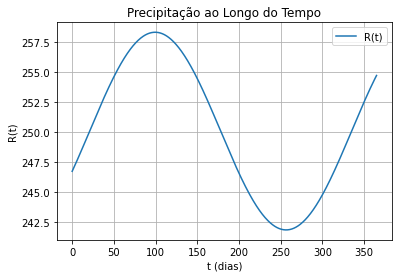

In [41]:
R1= 250.083 #146.9
R2= 0.033
omega2= 0.02
phi2=1.99

def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))
    
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
R_values = [R(t) for t in t_values]

# Plotando
plt.plot(t_values, R_values, label='R(t)')
plt.title('Precipitação ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('R(t)')
plt.legend()
plt.grid(True)
plt.show()

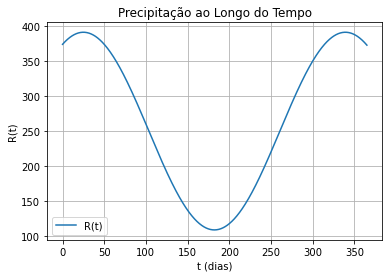

In [42]:
R1= 250.083 #146.9
R2= 0.565
omega2= 0.02
phi2=0.5

def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))
        
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
R_values = [R(t) for t in t_values]

# Plotando
plt.plot(t_values, R_values, label='R(t)')
plt.title('Precipitação ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('R(t)')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
R(25)

391.379895

In [44]:
R(170)

112.88962608946565

In [45]:
R(250)

220.29820806138807

In [46]:
R(260)

248.33252031949363

In [47]:
R(0)

374.08269110125497

In [48]:
R(365)

372.92616590722275

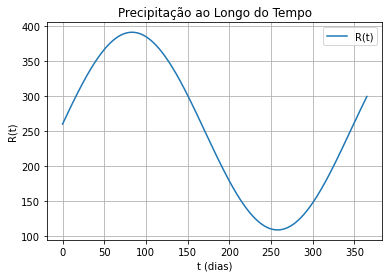

In [49]:
R1= 250.083 #146.9
R2= 0.565
omega2= 0.018
phi2=1.5

def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))
        
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
R_values = [R(t) for t in t_values]

# Plotando
plt.plot(t_values, R_values, label='R(t)')
plt.title('Precipitação ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('R(t)')
plt.legend()
plt.grid(True)
plt.show()

Precipitação média em janeiro:

In [50]:
R(15)

297.3097530345495

Precipitação média em março:

In [51]:
R(15+2*30)

389.7932831781658

In [52]:
round(389.7932831781658, 2)

389.79

Valor médio: 395 

Precipitação média em agosto:

In [53]:
R(15+7*30)

132.79901278749003

In [54]:
round(132.79901278749003, 2)

132.8

Valor médio: 114

Precipitação média em dezembro:

In [55]:
R(15+11*30)

249.74544481051166

In [56]:
R(365)

299.54219648133767

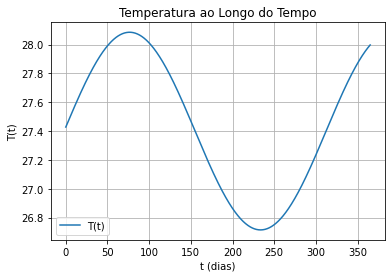

In [57]:
T1= 27.4
T2= 0.025
omega1= 0.02
phi1=1.53

def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))
        
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
T_values = [T(t) for t in t_values]

# Plotando
plt.plot(t_values, T_values, label='T(t)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('T(t)')
plt.legend()
plt.grid(True)
plt.show()

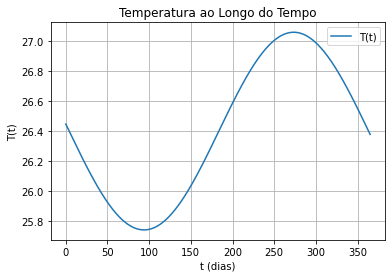

In [58]:
T1= 26.4 
T2= 0.025
omega1= 0.0175
phi1= -1.5

def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))
        
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
T_values = [T(t) for t in t_values]

# Plotando
plt.plot(t_values, T_values, label='T(t)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('T(t)')
plt.legend()
plt.grid(True)
plt.show()

Temperatura média em outubro:

In [59]:
T(15+9*30)

27.046272172021606

Temperatura média em maio:

In [60]:
T(15+4*30)

25.90420329457252

In [61]:
round(27.046272172021606, 2)

27.05

In [62]:
round(25.90420329457252, 2)

25.9

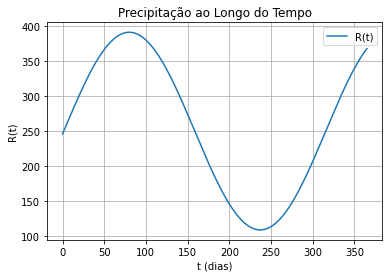

In [63]:
R1= 250.083 #146.9
R2= 0.565
omega2= 0.02
phi2=1.6

def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))
        
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
R_values = [R(t) for t in t_values]

# Plotando
plt.plot(t_values, R_values, label='R(t)')
plt.title('Precipitação ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('R(t)')
plt.legend()
plt.grid(True)
plt.show()

Precipitação média em março:

In [64]:
R(15+2*30)

390.6739990658519

In [65]:
round(390.6739990658519, 2)

390.67

Precipitação média em agosto:

In [66]:
R(15+7*30)

112.88962608946565

In [67]:
round(112.88962608946565, 2)

112.89